In [ ]:
# Let's suppose you have a list of lists
list_of_lists = [[1, 2, 3, 4, 5], [2, 7, 8, 9, 10], [2, 12, 13, 14, 15]]

# We use list comprehension with zip to get the average for each entry
average_list = [sum(values)/len(values) for values in zip(*list_of_lists)]

print(average_list)

In [ ]:
model_names = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'KNN']
# make model names the same length for printing in legend of ROC cuve plot later
for model_name in model_names:
    if len(model_name) < len(model_names[3]):
        model_names[model_names.index(model_name)] = model_name + ' ' * (len(model_names[3]) - len(model_name))
for i in model_names:
    print(i + '\n')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assume that 'models' is a list of your trained models and 'model_names' is a list of their corresponding names.
models = [rfc, bag, ada, gbc, knn]
model_names = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'KNN']

# Let's say 'X' is your feature matrix and 'y_bin' is your binarized target matrix
n_classes = y_bin.shape[1]
folds = 10
cv = KFold(n_splits=folds)

fig, ax = plt.subplots(figsize=(9,5))

for i in range(n_classes):
    for j, model in enumerate(models):
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        
        # 10-fold cross-validation
        for train, test in cv.split(X, y_bin[:, i]):
            probas_ = model.fit(X[train], y_bin[train, i]).predict_proba(X[test])
            # Compute ROC curve and area the curve
            fpr, tpr, thresholds = roc_curve(y_bin[test, i], probas_[:, 1])
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
        
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        ax.plot(mean_fpr, mean_tpr, linestyle='--', lw=2,
                label='ROC for class %d of %s (AUC = %0.2f)' % (i, model_names[j], mean_auc), alpha=0.8)

# Plotting base line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
ax.legend(loc="lower right")
plt.show()


In [ ]:
fig7, ax7 = plt.subplots(1, 1, figsize=(9,5))


ax7.plot(fpr, tpr, label=f'{types[0]} | roc_auc_score {roc_auc_score1:.4f} | mean_cv_score {cv_mean:.4f}')


ax7.plot([0, 1], [0, 1], label=f'base 0.5')

ax7.set_title('ROC Curves')
ax7.set_xlabel("False Positive Rate")
ax7.set_ylabel("True Positive Rate")
ax7.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [ ]:
fig7, ax7 = plt.subplots(1, 1, figsize=(9,5))

for i in range(n_classes):

    roc_auc_score_vars = []
    mean_cv_scores = []
    fprs = []
    tprs = []
    threshs = []

    for model in models:
        cv_prob_true = {}
        cv_probs = cross_val_predict(model, X, y_bin[:,i], cv=folds, method='predict_proba')
        cv_prob_true = cv_probs[:,1]
        fpr, tpr, thresh = roc_curve(y_bin[:,i], cv_prob_true)
        fprs.append(fpr)
        tprs.append(tpr)
        threshs.append(thresh)

        roc_auc_score_var = roc_auc_score(y_bin[:,i], cv_prob_true)
        roc_auc_score_vars.append(roc_auc_score_var)

        cv_scores = cross_val_score(model, X, y_bin[:,i], cv=folds, scoring='accuracy')
        cv_mean = cv_scores.mean()
        mean_cv_scores.append(cv_mean)

    average_fprs = [sum(values)/len(values) for values in zip(*fprs)]
    average_tprs = [sum(values)/len(values) for values in zip(*tprs)]
    average_threshs = [sum(values)/len(values) for values in zip(*threshs)]
    roc_auc_score_var_plot = np.array(roc_auc_score_vars).mean()
    mean_cv_score_plot = np.array(mean_cv_scores).mean()


    ax7.plot(average_fprs, average_tprs, label=f'{types[i]} | roc_auc_score {roc_auc_score_var_plot:.4f} | mean_cv_score {mean_cv_score_plot:.4f}')


ax7.plot([0, 1], [0, 1], label=f'base 0.5')

ax7.set_title('ROC Curves')
ax7.set_xlabel("False Positive Rate")
ax7.set_ylabel("True Positive Rate")
ax7.legend(bbox_to_anchor=(1, 1), loc='upper left')


# cv_prob_true = {}

# cv_probs = cross_val_predict(rfc, X, y_bin[:,1], cv=folds, method='predict_proba')

# cv_prob_true = cv_probs[:,1]
# fpr, tpr, thresh = roc_curve(y_bin[:,1], cv_prob_true)

# roc_auc_score1 = roc_auc_score(y_bin[:,1], cv_prob_true)

# cv_scores = cross_val_score(rfc, X, y_bin[:,1], cv=folds, scoring='accuracy')
# cv_mean = cv_scores.mean()

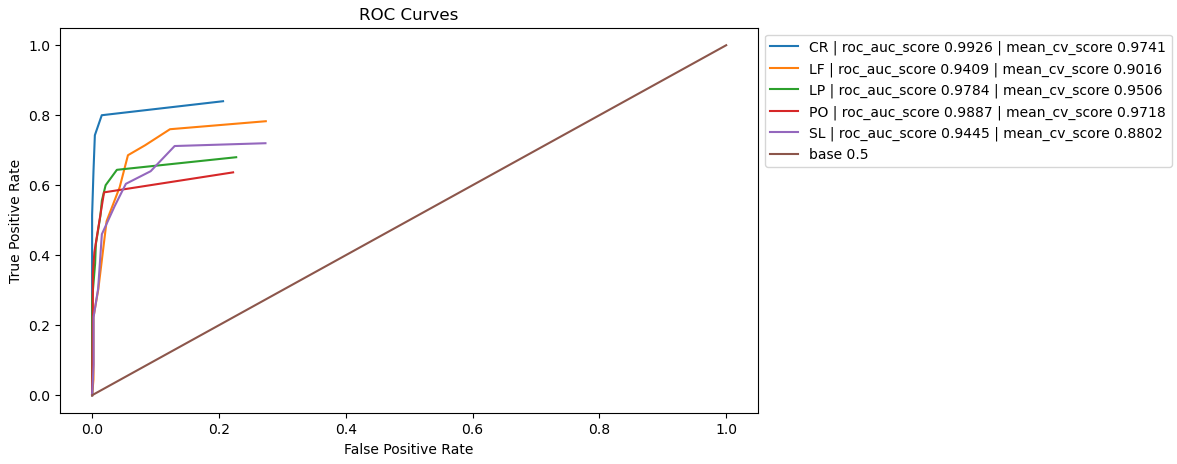

In [ ]:
# import numpy as np
# from sklearn.model_selection import cross_val_predict, cross_val_score
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# fig8, axs = plt.subplots(n_classes, 1, figsize=(9,5*n_classes))
# folds = 10
# types = ['CR', 'LF', 'LP', 'PO', 'SL'] # replace this with your class names

# for i, ax in enumerate(axs):

#     for model in models:
#         cv_prob_true = {}
#         cv_probs = cross_val_predict(model, X, y_bin[:,i], cv=folds, method='predict_proba')
#         cv_prob_true = cv_probs[:,1]
#         fpr, tpr, thresh = roc_curve(y_bin[:,i], cv_prob_true)

#         roc_auc_score_var = roc_auc_score(y_bin[:,i], cv_prob_true)

#         cv_scores = cross_val_score(model, X, y_bin[:,i], cv=folds, scoring='accuracy')
#         cv_mean = cv_scores.mean()

#         ax.plot(fpr, tpr, label=f'Model: {model.__class__.__name__} | roc_auc_score: {roc_auc_score_var:.4f} | mean_cv_score: {cv_mean:.4f}')

#     ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level')
#     ax.set_title(f'ROC Curves - {types[i]}')
#     ax.set_xlabel("False Positive Rate")
#     ax.set_ylabel("True Positive Rate")
#     ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fig7, ax7 = plt.subplots(1, 1, figsize=(9,5))
folds = 10
types = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'] # replace this with your class names

for i in range(n_classes):

    for model in models:
        cv_prob_true = {}
        cv_probs = cross_val_predict(model, X, y_bin[:,i], cv=folds, method='predict_proba')
        cv_prob_true = cv_probs[:,1]
        fpr, tpr, thresh = roc_curve(y_bin[:,i], cv_prob_true)

        roc_auc_score_var = roc_auc_score(y_bin[:,i], cv_prob_true)

        cv_scores = cross_val_score(model, X, y_bin[:,i], cv=folds, scoring='accuracy')
        cv_mean = cv_scores.mean()

        ax7.plot(fpr, tpr, label=f'{types[i]}, Model: {model.__class__.__name__} | roc_auc_score: {roc_auc_score_var:.4f} | mean_cv_score: {cv_mean:.4f}')

ax7.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance level')

ax7.set_title('ROC Curves')
ax7.set_xlabel("False Positive Rate")
ax7.set_ylabel("True Positive Rate")
ax7.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

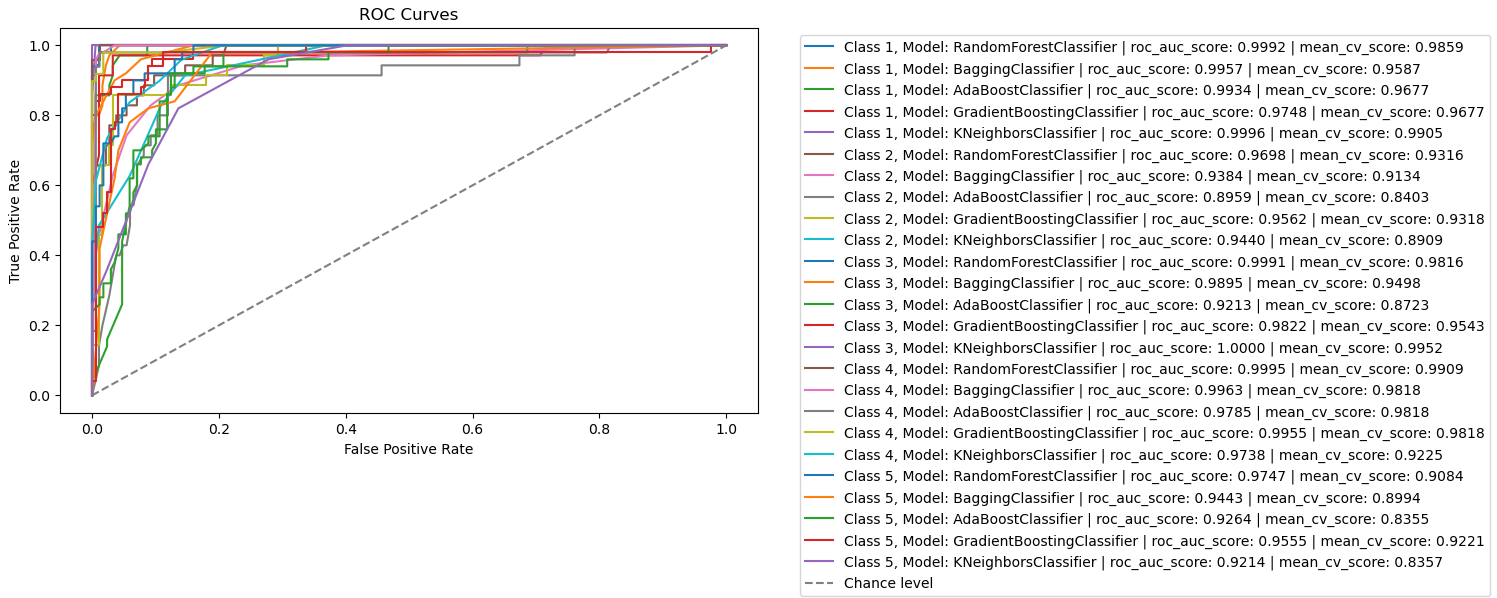